In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded=files.upload()

Saving telecom_customer_churn.csv to telecom_customer_churn.csv


In [76]:
df=pd.read_csv("telecom_customer_churn.csv")
df.head()
df.columns = df.columns.str.strip()
df.drop(columns=["Churn Category", "Churn Reason",], axis=1, inplace=True) ### Unnecessary columns with NaN values thus removed from the data.
print("\ndata:\n", df.head(3))


data:
   Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   

   Zip Code   Latitude   Longitude  Number of Referrals  ...        Contract  \
0     93225  34.827662 -118.999073                    2  ...        One Year   
1     91206  34.162515 -118.203869                    0  ...  Month-to-Month   
2     92627  33.645672 -117.922613                    0  ...  Month-to-Month   

  Paperless Billing   Payment Method  Monthly Charge Total Charges  \
0               Yes      Credit Card            65.6        593.30   
1                No      Credit Card            -4.0        542.40   
2               Yes  Bank Withdrawal            73.9        280.85   

  Total Refunds Total Extra Data Charges  Total Long Distance Charges  \
0          0.00     

In [77]:
print("column info:", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [78]:
print("dataset shape:",df.shape)

dataset shape: (7043, 36)


In [79]:
df.head()
print("total null values:",df.isnull().sum().sum())  ## total NaN values in the data =np.int64(20501)

total null values: 20501


In [80]:
df["Customer ID"].duplicated().sum() ## no duplicates


np.int64(0)

## NaN removing

In [81]:
for column in df.select_dtypes(object).columns:
  df[column]=df[column].fillna(df[column].mode()[0])

df.isnull().sum()

for column in df.select_dtypes("number").columns:
  df[column]=df[column].fillna(df[column].median())

df.isnull().sum().sum()
df.head(2)

print("total null values:",df.isnull().sum().sum())

total null values: 0


In [82]:
num_cols = df.select_dtypes(include="number").columns

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_counts = {}

for col in num_cols:
    lower = Q1[col] - 1.5 * IQR[col]
    upper = Q3[col] + 1.5 * IQR[col]
    outlier_counts[col] = ((df[col] < lower) | (df[col] > upper)).sum()

print(pd.Series(outlier_counts).sort_values(ascending=False))

Number of Dependents                 1627
Avg Monthly GB Download              1089
Total Extra Data Charges              728
Number of Referrals                   676
Total Refunds                         525
Total Long Distance Charges           196
Total Revenue                          21
Tenure in Months                        0
Longitude                               0
Latitude                                0
Zip Code                                0
Age                                     0
Total Charges                           0
Avg Monthly Long Distance Charges       0
Monthly Charge                          0
dtype: int64


In [83]:
col = "Number of Dependents"

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower) | (df[col] > upper)]

outliers.head()


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
5,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,...,Month-to-Month,Yes,Credit Card,69.40,571.45,0.0,0,150.93,722.38,Stayed
9,0016-QLJIS,Female,43,Yes,1,Sheridan,95681,38.984756,-121.345074,3,...,Two Year,Yes,Credit Card,90.45,5957.90,0.0,0,1849.90,7807.80,Stayed
11,0017-IUDMW,Female,25,Yes,2,Sunnyvale,94086,37.378541,-122.020456,2,...,Two Year,Yes,Credit Card,116.80,8456.75,0.0,0,1152.72,9609.47,Stayed
15,0020-INWCK,Female,58,Yes,2,Woodlake,93286,36.464635,-119.094348,9,...,Two Year,Yes,Credit Card,95.75,6849.40,0.0,0,1935.46,8784.86,Stayed
16,0020-JDNXP,Female,52,Yes,1,Point Reyes Station,94956,38.060264,-122.830646,0,...,One Year,No,Credit Card,61.25,1993.20,0.0,0,0.00,1993.20,Stayed


Outliers were not removed or clipped because they represent real customer behavior, not data errors.

Many outliers correspond to high-usage or high-value customers, which are important for churn prediction.

Applying log or IQR clipping at the cleaning stage can remove useful business signal.

Different models handle outliers differently, so transformations were deferred to model-specific pipelines.

Keeping raw values ensures fair comparison across multiple models.

In [84]:
# Save cleaned dataset properly as Excel file
df.to_excel("teleco_churn_clean_data.xlsx", index=False)



In [85]:
print(df["Total Revenue"].describe())
print(df["Monthly Charge"].describe())
print(df["Tenure in Months"].describe())


count     7043.000000
mean      3034.379056
std       2865.204542
min         21.360000
25%        605.610000
50%       2108.640000
75%       4801.145000
max      11979.340000
Name: Total Revenue, dtype: float64
count    7043.000000
mean       63.596131
std        31.204743
min       -10.000000
25%        30.400000
50%        70.050000
75%        89.750000
max       118.750000
Name: Monthly Charge, dtype: float64
count    7043.000000
mean       32.386767
std        24.542061
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure in Months, dtype: float64


# Churned revenue and monthly charges:

In [86]:
total_customers = df["Customer ID"].nunique()

total_stayed = (df["Customer Status"] == "Stayed").sum()
total_joined = (df["Customer Status"] == "Joined").sum()
total_churned = (df["Customer Status"] == "Churned").sum()

print("Total customers:", total_customers)
print("Total customers stayed:", total_stayed)
print("Total customers joined:", total_joined)
print("Total customers churned:", total_churned)

print("Percentage of customers who stayed:",round((total_stayed / total_customers) * 100, 2),"%")

print("Percentage of customers who churned:",round((total_churned / total_customers) * 100, 2),"%")

print("Total revenue:", df["Total Revenue"].sum())
print("Total mean revenue:", df["Total Revenue"].mean())
print("Total churned revenue:",df.loc[df["Customer Status"] == "Churned", "Total Revenue"].sum())


print("Total churned monthly charge:",df.loc[df["Customer Status"] == "Churned", "Monthly Charge"].sum())
print("Total mean churned monthly charge:", df.loc[df["Customer Status"]=="Churned", "Monthly Charge"].mean()) ### 73.34
print("Total mean not churned monthly charge:", df.loc[df["Customer Status"]=="Stayed", "Monthly Charge"].mean())   ###61.73




Total customers: 7043
Total customers stayed: 4720
Total customers joined: 454
Total customers churned: 1869
Percentage of customers who stayed: 67.02 %
Percentage of customers who churned: 26.54 %
Total revenue: 21371131.69
Total mean revenue: 3034.3790558000856
Total churned revenue: 3684459.8200000003
Total churned monthly charge: 137086.65
Total mean churned monthly charge: 73.3475922953451
Total mean not churned monthly charge: 61.737415254237284


## Month to month contract has highest churn counts

In [87]:
print("\n Contrct type churn counts:\n", df["Contract"][df["Customer Status"]=="Churned"].value_counts())


 Contrct type churn counts:
 Contract
Month-to-Month    1655
One Year           166
Two Year            48
Name: count, dtype: int64


In [88]:
Month_to_month = df[ (df["Contract"] == "Month-to-Month") & (df["Customer Status"] == "Churned")].shape[0]
One_year = df[(df["Contract"]=="One Year") & (df["Customer Status"]=="Churned")].shape[0]
Two_year = df[(df["Contract"]=="Two Year") & (df["Customer Status"]=="Churned")].shape[0]


print("Month-to-Month churn %:", round((Month_to_month / total_customers) * 100, 2))
print("One Year churn %:", round((One_year / total_customers) * 100, 2))
print("Two Year churn %:", round((Two_year / total_customers) * 100, 2))

Month-to-Month churn %: 23.5
One Year churn %: 2.36
Two Year churn %: 0.68


In [89]:

df["Lifetime Revenue"] = df["Monthly Charge"] * df["Tenure in Months"]

print(
    "Total churned lifetime revenue:",
    df.loc[df["Customer Status"] == "Churned", "Lifetime Revenue"].sum()
)


Total churned lifetime revenue: 2838172.6


## Total churn percentage:

In [90]:
df["Churn Count"] = df["Customer Status"].apply(lambda x: 1 if x == "Stayed" else (0 if x == "Churned" else 2))
                                                ########## 1==Stayed, 2==Joined, 0==Churned

df["Churn Count"]

x=((df["Churn Count"]==0).sum()/df["Customer ID"].value_counts().sum())*100
print("Churn Percentage", x)   ## 26.53% Churn Percentage



Churn Percentage 26.536987079369588


## Elderly customer getting chured irrespective of gender

In [91]:
print(pd.crosstab(df["Age"], df["Customer Status"]))

Customer Status  Churned  Joined  Stayed
Age                                     
19                    18      15      94
20                    30       9      88
21                    36      12      92
22                    27      12      91
23                    29       8     109
..                   ...     ...     ...
76                    29       2      38
77                    29       0      43
78                    30       0      33
79                    27       3      46
80                    29       2      35

[62 rows x 3 columns]


In [92]:
df[df["Customer Status"]=="Churned"]["Age"].head(10)

,Age
2,50
3,78
4,75
18,79
19,67
21,26
24,34
25,37
40,69
53,51


In [93]:
df[(df["Customer Status"] == "Churned") &
   (df["Gender"] == "Male")]["Age"].sort_values(ascending=False).head(5)


,Age
3094,80
6005,80
2951,80
5957,80
6083,80


In [94]:
df[(df["Customer Status"] == "Churned") &
   (df["Gender"] == "Female")]["Age"].sort_values(ascending=False).head(5)

,Age
5260,80
5229,80
1215,80
5913,80
2972,80


In [95]:
df[df["Customer Status"]=="Churned"]["Age"].sort_values(ascending=False).head(5)

,Age
6500,80
4182,80
2951,80
2941,80
4933,80


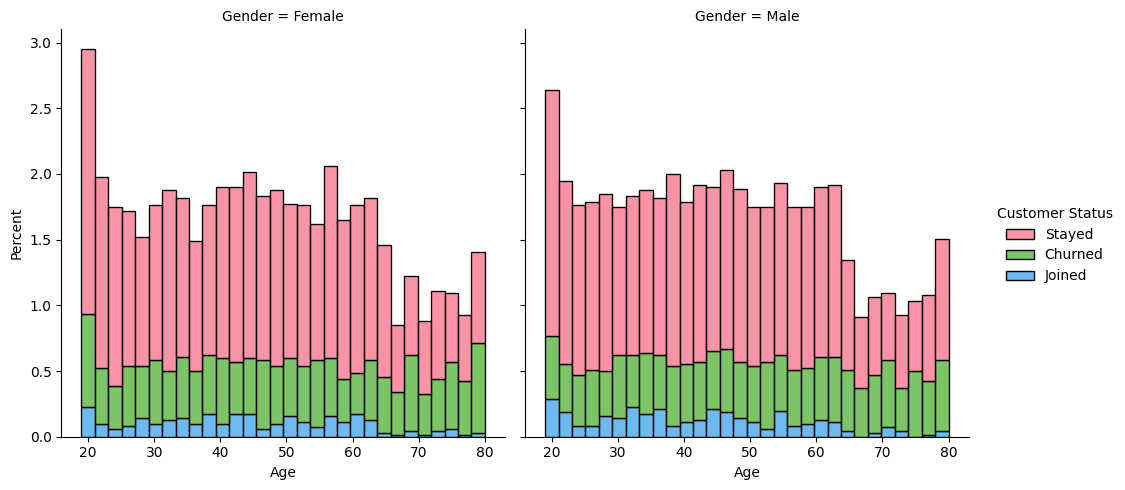

In [96]:
sns.displot(x=df["Age"],hue=df["Customer Status"], col=df["Gender"], stat="percent", bins=30,
    multiple="stack",palette="husl")


plt.show()


## Unamrried category shows more churn precentage comapre to married:

In [97]:
married_customers = df[df["Married"] == "Yes"]

married_churn_rate = ((married_customers["Customer Status"] == "Churned").sum()/ married_customers.shape[0]) * 100

print("Churn rate among married customers:",round(married_churn_rate, 2),"%")



print("Unmarried churn percentage:", round(((df["Married"]=="No") & (df["Customer Status"]=="Churned")).sum() / (df["Customer Status"]=="Churned").sum() * 100, 2), "%")



Churn rate among married customers: 19.66 %
Unmarried churn percentage: 64.21 %


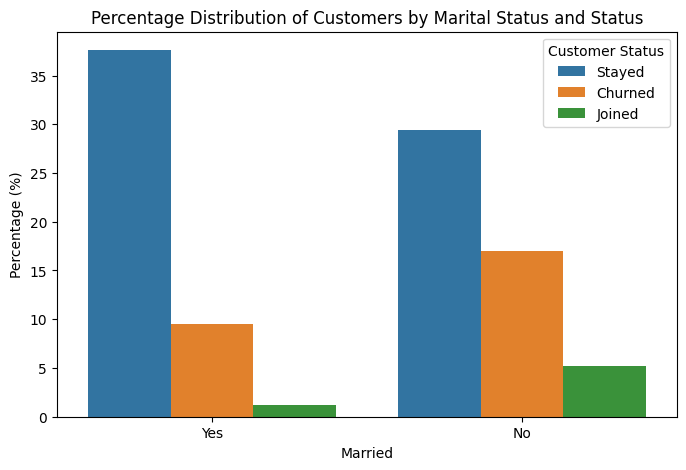

In [98]:

plt.figure(figsize=(8,5))
sns.countplot(x="Married", hue="Customer Status",data=df, stat="percent")
plt.title("Percentage Distribution of Customers by Marital Status and Status")
plt.ylabel("Percentage (%)")
plt.show()


##### countplot is only use for categorical (non numerical) data only

### Unmarried customers shows higer churn.



## Tenure wise churn

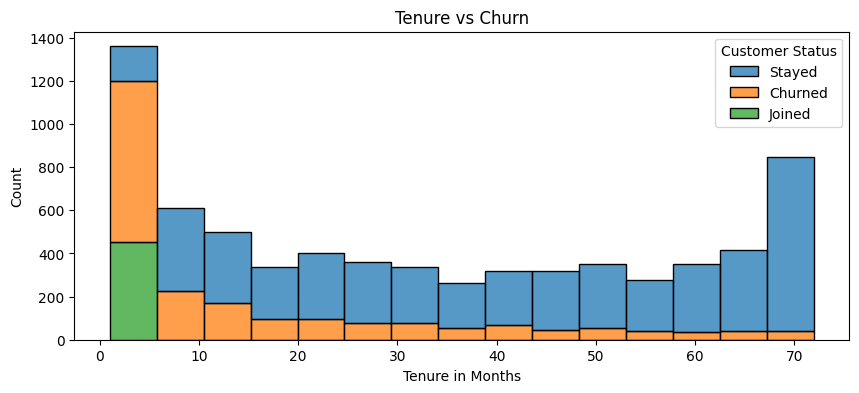

In [99]:
plt.figure(figsize=(10,4))
sns.histplot( x=df["Tenure in Months"], hue=df["Customer Status"], multiple="stack")
plt.title("Tenure vs Churn")
plt.show()                            ## Early tenure shows highest churn.

## Early tenure sengment (0-10 months) shows highest churn percentage:

In [100]:
pd.crosstab(df["Tenure in Months"], df["Customer Status"])

Customer Status,Churned,Joined,Stayed
Tenure in Months,,,
1,380,233,0
2,123,115,0
3,94,106,0
4,83,0,93
5,64,0,69
...,...,...,...
68,9,0,91
69,8,0,87
70,11,0,108


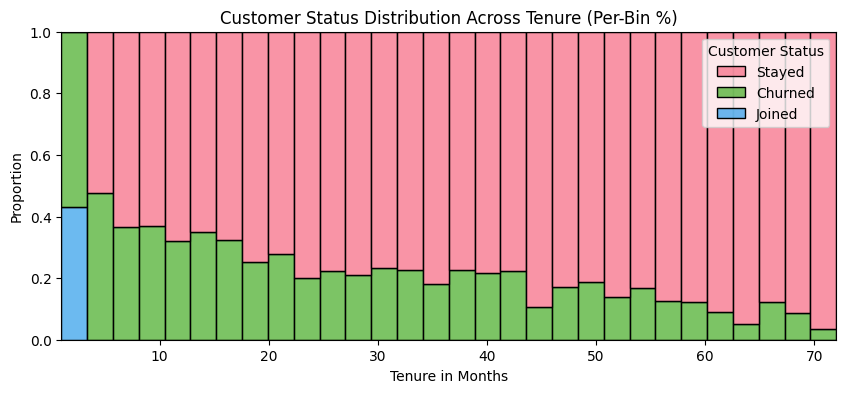

In [101]:
plt.figure(figsize=(10,4))
sns.histplot(
    data=df,
    x="Tenure in Months",
    hue="Customer Status",
    multiple="fill",
    bins=30,
    palette="husl"
)

plt.title("Customer Status Distribution Across Tenure (Per-Bin %)")
plt.ylabel("Proportion")
plt.xlabel("Tenure in Months")
plt.show()


## Month to month contract faces highest churn conpare to rest

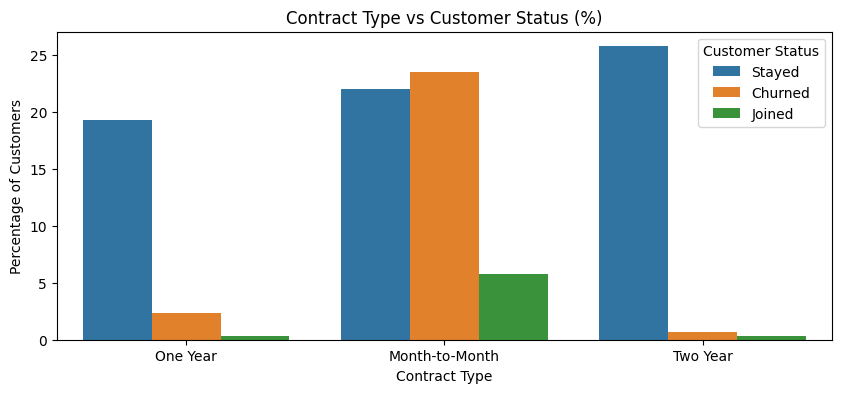

In [102]:
plt.figure(figsize=(10,4))
sns.countplot(
    data=df,
    x="Contract",
    hue="Customer Status",
    stat="percent"
)
plt.title("Contract Type vs Customer Status (%)")
plt.xlabel("Contract Type")
plt.ylabel("Percentage of Customers")

plt.show()


In [103]:
pivot=pd.pivot_table(df, index=["Customer Status"],
                      values=["Total Long Distance Charges", "Total Charges","Monthly Charge"],
                     aggfunc="mean")
pivot


#Churned customers have the highest monthly bills, joined customers start with lower charges. Higher monthly cost is a strong churn driver.

,Monthly Charge,Total Charges,Total Long Distance Charges
Customer Status,,,
Churned,73.347592,1531.796094,433.917549
Joined,42.775991,79.292731,38.125991
Stayed,61.737415,2788.516831,942.289195


## Bank Withdrawal payment method has highest churn percent:


Payment Method   Bank Withdrawal  Credit Card  Mailed Check
Customer Status                                            
Churned                     1329          398           142
Joined                       181          231            42
Stayed                      2399         2120           201


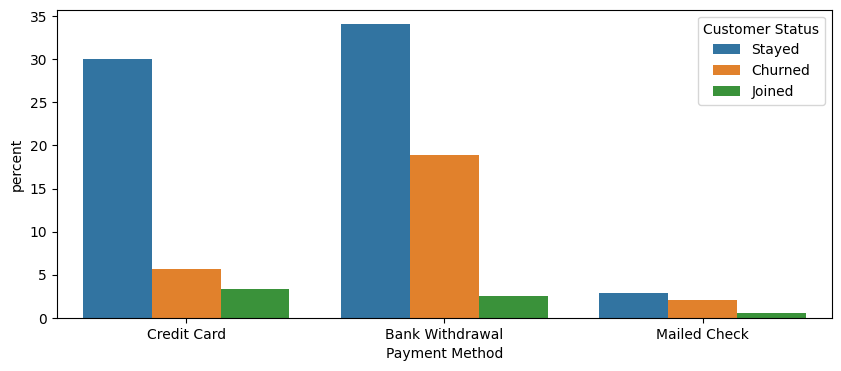

In [104]:
print(pd.crosstab(df["Customer Status"], df["Payment Method"]))


plt.figure(figsize=(10,4))
sns.countplot(x=df["Payment Method"],  hue=df["Customer Status"], stat="percent")
plt.show()  ##### countplot is only use for categorical (non numerical) data only

## Monthly Charge is higher in bank withdrawal payment method

In [105]:
df.groupby("Customer Status")[["Total Charges", "Monthly Charge", "Total Refunds"]].mean().sort_values(by="Total Charges", ascending=False)
#Montly Chrage is higher in chruned over stayed and joined categories

,Total Charges,Monthly Charge,Total Refunds
Customer Status,,,
Stayed,2788.516831,61.737415,2.303458
Churned,1531.796094,73.347592,1.518983
Joined,79.292731,42.775991,0.238656


In [106]:
print(pd.crosstab(index=df["Customer Status"],
           columns=[df["Paperless Billing"], df["Phone Service"]])) ## paperlessbiling also increases the churn of customers.

Paperless Billing   No        Yes      
Phone Service       No   Yes   No   Yes
Customer Status                        
Churned             52   417  118  1282
Joined              27   230   11   186
Stayed             216  1930  258  2316


## Monthly Revenue Loss from Churned Customers by Payment Method

Total Monthly Charge (Bank Withdrawal, Churned): 103093.7
Total Monthly Charge (Credit Card, Churned): 26486.5
Total Monthly Charge (Mailed Check, Churned): 7506.45


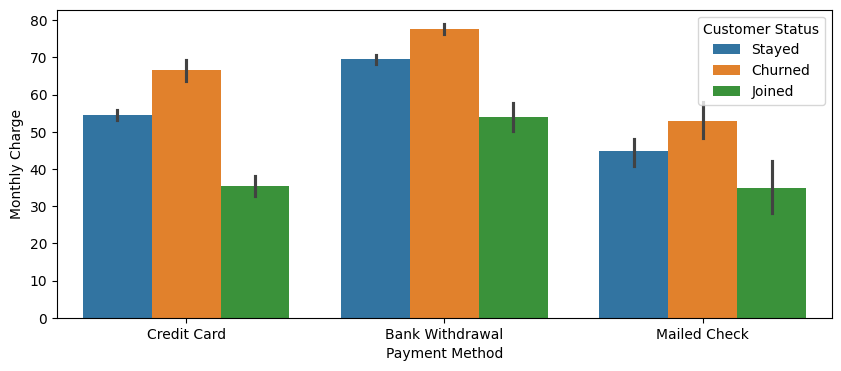

In [107]:
print("Total Monthly Charge (Bank Withdrawal, Churned):",
      round(df.loc[(df["Payment Method"]=="Bank Withdrawal") & (df["Customer Status"]=="Churned"), "Monthly Charge"].sum(), 2))

print("Total Monthly Charge (Credit Card, Churned):",
      round(df.loc[(df["Payment Method"]=="Credit Card") & (df["Customer Status"]=="Churned"), "Monthly Charge"].sum(), 2))

print("Total Monthly Charge (Mailed Check, Churned):",
      round(df.loc[(df["Payment Method"]=="Mailed Check") & (df["Customer Status"]=="Churned"), "Monthly Charge"].sum(), 2))




plt.figure(figsize=(10,4))
sns.barplot(x=df["Payment Method"], y=df["Monthly Charge"], hue=df["Customer Status"])
plt.show()

## Bank withdrawl and Mailed check has higer churn compare to credit card

In [108]:
x = pd.crosstab(df["Payment Method"], df["Customer Status"], normalize="index")*100
x

# Create crosstab of counts, normalized by Payment Method

Customer Status,Churned,Joined,Stayed
Payment Method,,,
Bank Withdrawal,33.998465,4.630340,61.371195
Credit Card,14.477992,8.403056,77.118952
Mailed Check,36.883117,10.909091,52.207792


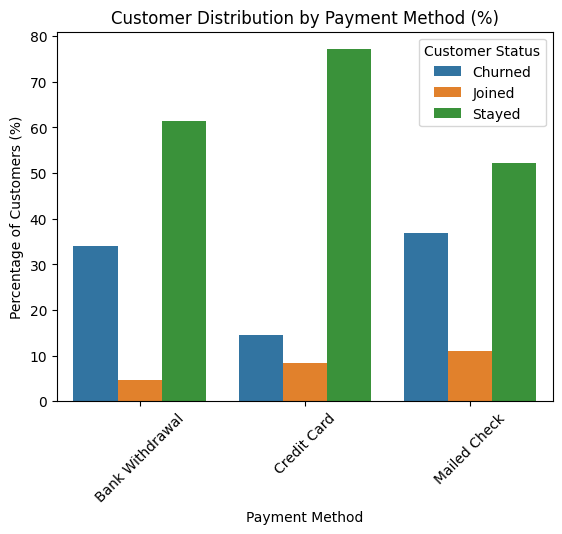

In [109]:
payment_churn_crosstab = pd.crosstab(df["Payment Method"], df["Customer Status"], normalize="index")*100

# Convert to long format for plotting
plot_data = payment_churn_crosstab.reset_index().melt(id_vars="Payment Method", var_name="Customer Status", value_name="Percentage")

plot_data.head()

sns.barplot(
    data=plot_data,
    x="Payment Method",
    y="Percentage",
    hue="Customer Status"
)

plt.title("Customer Distribution by Payment Method (%)")
plt.ylabel("Percentage of Customers (%)")
plt.xlabel("Payment Method")
plt.xticks(rotation=45)
plt.show()                                                         ### Bank withdrawal and Mailed Check shows higher churn then creditcard.

## Churned customers contributes to total revenue faced high monthly charge → major loss risk

In [110]:
df.groupby(["Customer Status"])[["Total Revenue", "Total Charges", "Monthly Charge"]].mean()

,Total Revenue,Total Charges,Monthly Charge
Customer Status,,,
Churned,1971.353569,1531.796094,73.347592
Joined,119.558921,79.292731,42.775991
Stayed,3735.676297,2788.516831,61.737415


In [111]:
df.groupby(["Customer Status","Internet Service", "Online Security", "Online Backup" ])[["Monthly Charge"]].mean()

Monthly Charge
Customer Status Internet Service Online Security Online Backup                
Churned         No               No              No                  19.646460
                Yes              No              No                  72.512394
                                                 Yes                 85.018936
                                 Yes             No                  76.377557
                                                 Yes                 87.654622
Joined          No               No              No                  19.885714
                Yes              No              No                  55.863661
                                                 Yes                 61.981395
                                 Yes             No                  59.462857
                                                 Yes                 75.604545
Stayed          No               No              No                  20.810398
                Yes              No              No                  70.269372
                                                 Yes                 80.549357
                                 Yes             No                  71.158138
                                                 Yes                 81.521737

### Fiber optic internet type shows highest churn

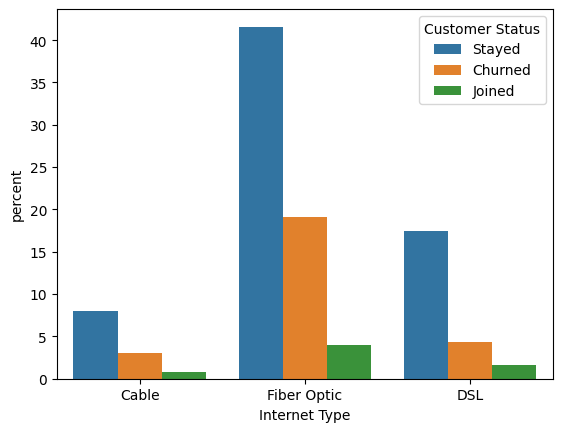

In [112]:
sns.countplot(x=df["Internet Type"], hue=df["Customer Status"], stat="percent")
plt.show()                ### Fiber optic showed higher churned.

## Customers with lower number of dependents shows higher churn

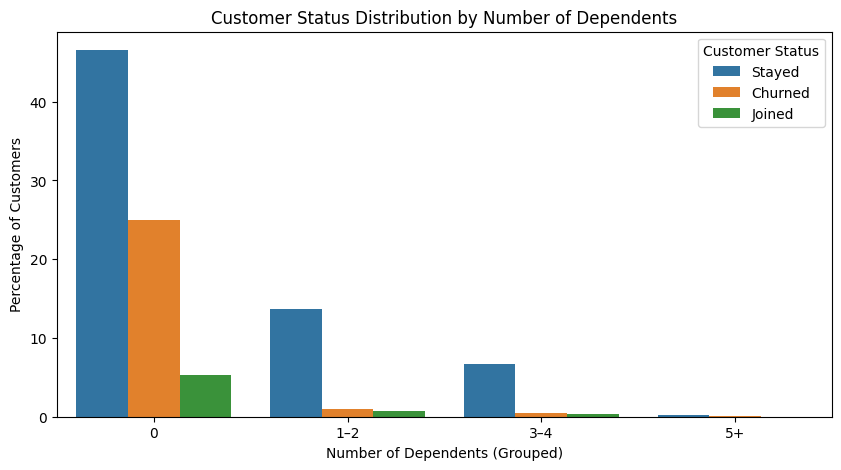

In [113]:
df["Dependents Group"] = pd.cut(
    df["Number of Dependents"],
    bins=[-1, 0, 2, 4, 10],
    labels=["0", "1–2", "3–4", "5+"]
)

plt.figure(figsize=(10,5))
sns.countplot(x=df["Dependents Group"], hue=df["Customer Status"], stat="percent")
plt.ylabel("Percentage of Customers")
plt.xlabel("Number of Dependents (Grouped)")
plt.title("Customer Status Distribution by Number of Dependents")
plt.show()

### less numer of dependents shows higher churn.




In [114]:
df.groupby(["Customer Status"])[["Avg Monthly Long Distance Charges"]].mean()

## no significan difference between customerstatus and avg monthly long distance charges.

,Avg Monthly Long Distance Charges
Customer Status,
Churned,25.504339
Joined,24.451432
Stayed,25.519477


## Churned customers have higher density in low-revenue range

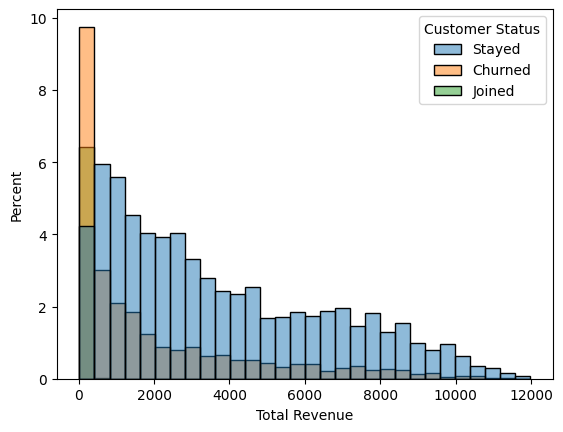

In [115]:
sns.histplot(x=df["Total Revenue"], hue=df["Customer Status"], stat="percent", bins=30)
plt.show()

## Customers with high monthly charges who churn tend to do so early, before accumulating significant total charges.

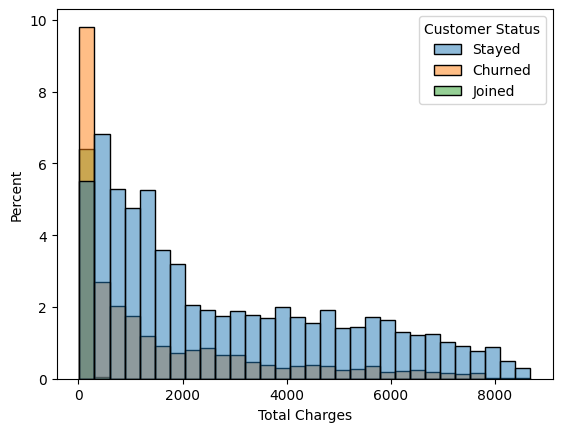

In [116]:
sns.histplot(x=df["Total Charges"], hue=df["Customer Status"], stat="percent", bins=30)
plt.show()

## Churned category has less number of referrals compare to stayed ones


total referrals:
 Customer Status
Churned      974
Joined       431
Stayed     12342
Name: Number of Referrals, dtype: int64


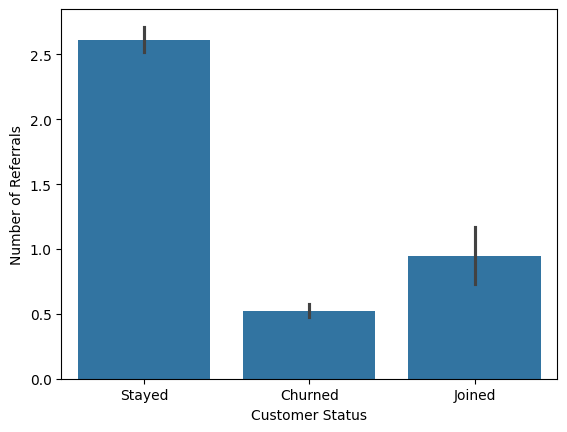

In [117]:
print("\ntotal referrals:\n", df.groupby("Customer Status")["Number of Referrals"].sum())


sns.barplot(data=df, x="Customer Status", y="Number of Referrals")
plt.show()

# 📊 Exploratory Data Analysis (EDA) Summary – Telecom Customer Churn

## 🧭 Objective
To analyze customer behavior, service usage, and account attributes to identify the key factors driving **customer churn**.

---

## ⚙️ Dataset Overview
- **Total Customers:** 7,043  
- **Target Variable:** `Customer Status` → {Stayed, Churned, Joined}  
- **Feature Categories:**
  - Demographics: Gender, Age, Marital Status, Dependents  
  - Account Info: Tenure, Contract Type, Payment Method, Paperless Billing  
  - Services: Internet, Phone, Streaming, Security, Backup  
  - Financial: Monthly Charges, Total Charges, Total Revenue  

✅ **Data Quality:** no major missing values, categorical variables encoded, numeric features standardized, outliers handled selectively.

---

## 👥 Customer Demographics Insights
| Feature | Observation | Insight |
|----------|--------------|----------|
| Gender | Nearly balanced | Minimal impact on churn |
| Marital Status | ~48% Married, ~52% Unmarried | Unmarried churn slightly more |
| Dependents | Customers without dependents churn more | Indicates less stability |

---

## 📆 Tenure and Loyalty
- **Average Tenure:** ~30 months  
- **Churn Rate:** sharply higher for customers with tenure < 12 months  
- **Long-term customers (≥36 months)** show very low churn.

**Business Insight:**  
The **first year of service** is the critical churn window; focus retention on new customers within 6–12 months.

---

## 💸 Billing and Payment Insights
| Factor | Pattern | Implication |
|---------|----------|-------------|
| Monthly Charges | Higher charges → higher churn | Review high-charge plans |
| Contract Type | Month-to-month churns most | Incentivize 1- or 2-year contracts |
| Payment Method | Bank Withdrawal churns most | Billing experience issues |
| Paperless Billing | More churn | Possibly price-sensitive users |

---

## 🌐 Service Usage Insights
| Service | Pattern | Insight |
|----------|----------|----------|
| Internet | Fiber-optic users churn more | Pricing or reliability issues |
| Security/Backup | Absence correlates with churn | Bundles improve stickiness |
| Streaming | Mixed effect | Weak retention driver |

---

## 💰 Revenue Analysis
- **Avg Churned Monthly Charge:** ~\$73.34  
- **Churned customers** contribute higher revenue → major loss risk.

**Business Takeaway:**  
High-value customers leaving; target loyalty programs or discounts.

---

## 📞 Contract and Service Type
| Contract Type | Churn % | Retention Tip |
|----------------|----------|----------------|
| Month-to-Month | ~23.5% | Add loyalty benefits |
| One-Year | ~2.36% | Offer renewal rewards |
| Two-Year | ~0.7% | Very stable |


---

## 🚦 Churn Distribution
| Status | Count | % |
|---------|--------|--|
| Stayed | 4,720 | 67% |
| Churned | 1,869 | 26% |
| Joined | 454 | 6% |

*Class imbalance addressed using SMOTE.*

---

## 🧩 Key Takeaways
- Churn is primarily behavioral and pricing-driven.  
- Early-tenure, month-to-month, high-bill customers are at highest risk.  
- Retaining of high-value churners yields major revenue gains.

**Retention levers:**
- Encourage longer contracts  
- Discounts for high spenders  
- Engage early-tenure customers  
- Bundle value-added services

---

## 🏁 Summary
> Churn is mainly driven by **short tenure, flexible contracts, and higher billing amounts** — targeting these customers early can significantly reduce churn.


## Machine Learning model establishment

In [118]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from imblearn.over_sampling import BorderlineSMOTE
import pandas as pd


df=pd.read_excel("teleco_churn_clean_data.xlsx")

# Save Customer ID BEFORE modifying anything
customer_ids = df["Customer ID"].values


# Create Geo-Clusters from Latitude & Longitude

kmeans = KMeans(n_clusters=6, random_state=42)
df["GeoCluster"] = kmeans.fit_predict(df[["Latitude", "Longitude"]])



# Define features X and target y. Do NOT modify df itself.

y = df["Customer Status"]   # target

x = df.drop([
    "Customer ID",         # only removed from features,
    "Customer Status",     # but still exists in df
    "City",
    "Zip Code",
    "Latitude",
    "Longitude"
], axis=1)



# One-Hot Encoding

x = pd.get_dummies(x, drop_first=True)



# Label Encoding for target

# encoders = {}
label = LabelEncoder()
y = label.fit_transform(y.astype(str))
# encoders["Customer Status"] = label



# Train-Test Split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=0
)


#Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


# Handle imbalance using Borderline SMOTE
sm = BorderlineSMOTE(kind='borderline-1', random_state=0)
x_train_resample, y_train_resample = sm.fit_resample(x_train_scaled, y_train)


# Check balance
print("Before SMOTE:\n", pd.Series(y_train).value_counts())
print("\nAfter Borderline SMOTE:\n", pd.Series(y_train_resample).value_counts())


Before SMOTE:
 2    3776
0    1495
1     363
Name: count, dtype: int64

After Borderline SMOTE:
 2    3776
1    3776
0    3776
Name: count, dtype: int64


In [119]:
print("\nEncoded Target (y):")
print(y)

print("\nEncoded Feature DataFrame (X):")
display(x.head())


Encoded Target (y):
[2 2 0 ... 1 2 2]

Encoded Feature DataFrame (X):


,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,...,Premium Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,Streaming Music_Yes,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check
0,37,0,2,9,42.39,16,65.6,593.30,0.00,0,...,True,True,False,False,True,True,False,True,True,False
1,46,0,0,9,10.69,10,-4.0,542.40,38.33,10,...,False,False,True,True,False,False,False,False,True,False
2,50,0,0,4,33.65,30,73.9,280.85,0.00,0,...,False,False,False,False,True,False,False,True,False,False
3,78,0,1,13,27.82,4,98.0,1237.85,0.00,0,...,False,True,True,False,True,False,False,True,False,False
4,75,0,3,3,7.38,11,83.9,267.40,0.00,0,...,True,True,False,False,True,False,False,True,True,False


## Label encoders decoding  

In [120]:
class_labels = dict(zip(label.transform(label.classes_), label.classes_))
print(class_labels)

{np.int64(0): 'Churned', np.int64(1): 'Joined', np.int64(2): 'Stayed'}


## Model selection and evaluation

In [121]:
!pip install catboost

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, log_loss, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced", random_state=0),
    "Decision Tree": DecisionTreeClassifier(max_depth=6, class_weight="balanced", random_state=0),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=6, class_weight="balanced", random_state=0),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, max_depth=3, random_state=0),
    "Naive Bayes": GaussianNB(),
    "SVM (RBF)": SVC(probability=True, class_weight="balanced", random_state=0),
    "XGBoost": XGBClassifier(n_estimators=200, max_depth=6,
                             eval_metric="mlogloss", random_state=0, use_label_encoder=False),
    "CatBoost": CatBoostClassifier(iterations=200, max_depth=6,
                                   loss_function="MultiClass", random_state=0, verbose=False)
}

class_labels = {0: "Churned", 1: "Joined", 2: "Stayed"}


for model_name, model in models.items():

    print("\n" + "=" * 30)
    print(f"MODEL: {model_name}")
    print("=" * 30)

    model.fit(x_train_resample, y_train_resample)

    y_train_predictions = model.predict(x_train_resample)
    y_test_predictions = model.predict(x_test_scaled)

    y_train_probabilities = model.predict_proba(x_train_resample)
    y_test_probabilities = model.predict_proba(x_test_scaled)

    train_accuracy = accuracy_score(y_train_resample, y_train_predictions)
    test_accuracy = accuracy_score(y_test, y_test_predictions)

    train_log_loss = log_loss(y_train_resample, y_train_probabilities)
    test_log_loss = log_loss(y_test, y_test_probabilities)

    print(f"Train Log Loss: {train_log_loss:.4f} | Test Log Loss: {test_log_loss:.4f}")
    print(f"Train Accuracy: {train_accuracy:.4f} | Test Accuracy: {test_accuracy:.4f}")

    print("\nPer-Class Metrics:")
    for cls, class_name in class_labels.items():

        y_test_binary = (y_test == cls).astype(int)
        y_pred_binary = (y_test_predictions == cls).astype(int)

        precision = precision_score(y_test_binary, y_pred_binary, zero_division=0)
        recall = recall_score(y_test_binary, y_pred_binary, zero_division=0)
        f1 = f1_score(y_test_binary, y_pred_binary, zero_division=0)

        roc_auc = roc_auc_score(
            y_test_binary,
            y_test_probabilities[:, cls]
        )

        print(f"{class_name} | Precision={precision:.3f}  "
              f"Recall={recall:.3f}  F1={f1:.3f}  ROC-AUC={roc_auc:.3f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_test_predictions))

    print("\nClassification Report:")
    print(classification_report(y_test, y_test_predictions, zero_division=0))



MODEL: Logistic Regression
Train Log Loss: 0.4610 | Test Log Loss: 0.5011
Train Accuracy: 0.8015 | Test Accuracy: 0.7480

Per-Class Metrics:
Churned | Precision=0.542  Recall=0.650  F1=0.591  ROC-AUC=0.832
Joined | Precision=0.426  Recall=0.912  F1=0.580  ROC-AUC=0.968
Stayed | Precision=0.950  Recall=0.771  F1=0.851  ROC-AUC=0.939

Confusion Matrix:
[[243  93  38]
 [  8  83   0]
 [197  19 728]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.65      0.59       374
           1       0.43      0.91      0.58        91
           2       0.95      0.77      0.85       944

    accuracy                           0.75      1409
   macro avg       0.64      0.78      0.67      1409
weighted avg       0.81      0.75      0.76      1409


MODEL: Decision Tree
Train Log Loss: 0.3836 | Test Log Loss: 0.6160
Train Accuracy: 0.8384 | Test Accuracy: 0.7757

Per-Class Metrics:
Churned | Precision=0.569  Recall=0.642  F1=0.603  ROC-AUC=

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:02:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Train Log Loss: 0.0145 | Test Log Loss: 0.4600
Train Accuracy: 1.0000 | Test Accuracy: 0.8311

Per-Class Metrics:
Churned | Precision=0.709  Recall=0.618  F1=0.660  ROC-AUC=0.894
Joined | Precision=0.626  Recall=0.736  F1=0.677  ROC-AUC=0.980
Stayed | Precision=0.894  Recall=0.925  F1=0.909  ROC-AUC=0.947

Confusion Matrix:
[[231  40 103]
 [ 24  67   0]
 [ 71   0 873]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.66       374
           1       0.63      0.74      0.68        91
           2       0.89      0.92      0.91       944

    accuracy                           0.83      1409
   macro avg       0.74      0.76      0.75      1409
weighted avg       0.83      0.83      0.83      1409


MODEL: CatBoost
Train Log Loss: 0.1147 | Test Log Loss: 0.3564
Train Accuracy: 0.9712 | Test Accuracy: 0.8311

Per-Class Metrics:
Churned | Precision=0.705  Recall=0.626  F1=0.663  ROC-AUC=0.897
Joined | Precision=0.613  R

Multiple models were evaluated using train–test log loss, accuracy, ROC-AUC, and confusion matrices to assess both performance and generalization. Models showing underfitting or severe overfitting were excluded. Random Forest was selected as it achieved a strong test ROC-AUC with minimal train–test performance gap, indicating stable generalization. Its robustness and resistance to overfitting make it suitable for real-world deployment.

### Fine tuned GrardientBoost

In [123]:
GradientBoosting_tuned = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=5,
    subsample=0.8,
    random_state=0
)

# Train
GradientBoosting_tuned.fit(x_train_resample, y_train_resample)

# Predictions
y_train_predictions = GradientBoosting_tuned.predict(x_train_resample)
y_test_predictions = GradientBoosting_tuned.predict(x_test_scaled)

y_train_probabilities = GradientBoosting_tuned.predict_proba(x_train_resample)
y_test_probabilities = GradientBoosting_tuned.predict_proba(x_test_scaled)

# Log Loss
train_log_loss = log_loss(y_train_resample, y_train_probabilities)
test_log_loss = log_loss(y_test, y_test_probabilities)

# Accuracy
train_accuracy = accuracy_score(y_train_resample, y_train_predictions)
test_accuracy = accuracy_score(y_test, y_test_predictions)

print(f"Train Log Loss: {train_log_loss:.4f}")
print(f"Test  Log Loss: {test_log_loss:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test  Accuracy: {test_accuracy:.4f}")

# Per-class metrics (one-vs-rest)
print("\nPer-Class Metrics:")
for cls, class_name in class_labels.items():

    y_test_binary = (y_test == cls).astype(int)
    y_pred_binary = (y_test_predictions == cls).astype(int)

    precision = precision_score(y_test_binary, y_pred_binary, zero_division=0)
    recall = recall_score(y_test_binary, y_pred_binary, zero_division=0)
    f1 = f1_score(y_test_binary, y_pred_binary, zero_division=0)

    roc_auc = roc_auc_score(
        y_test_binary,
        y_test_probabilities[:, cls]
    )

    print(
        f"{class_name} | "
        f"Precision={precision:.3f}  "
        f"Recall={recall:.3f}  "
        f"F1={f1:.3f}  "
        f"ROC-AUC={roc_auc:.3f}"
    )

    # Confusion Matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_test_predictions))

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_predictions, zero_division=0))

Train Log Loss: 0.2284
Test  Log Loss: 0.3509
Train Accuracy: 0.9145
Test  Accuracy: 0.8396

Per-Class Metrics:
Churned | Precision=0.736  Recall=0.618  F1=0.672  ROC-AUC=0.897

Confusion Matrix:
[[231  56  87]
 [ 11  80   0]
 [ 72   0 872]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.62      0.67       374
           1       0.59      0.88      0.70        91
           2       0.91      0.92      0.92       944

    accuracy                           0.84      1409
   macro avg       0.74      0.81      0.76      1409
weighted avg       0.84      0.84      0.84      1409

Joined | Precision=0.588  Recall=0.879  F1=0.705  ROC-AUC=0.981

Confusion Matrix:
[[231  56  87]
 [ 11  80   0]
 [ 72   0 872]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.62      0.67       374
           1       0.59      0.88      0.70        91
           2       0.91      0.92    

Gradient Boosting was selected due to its strong generalization and well-calibrated probabilities, with a low test log loss of 0.35 and a controlled train–test gap.
The model achieved a high test accuracy of 0.84 and a weighted F1-score of 0.84, indicating stable overall performance.
For the business-critical churned class (Class 0), it achieved the highest precision (0.74) among all evaluated models, reducing false churn alerts.
It also maintained a balanced churn F1-score of 0.67 with meaningful recall (0.62).
Strong per-class ROC-AUC scores (0.90–0.98) confirm effective class separability.
Overall, Gradient Boosting delivers the best bias–variance trade-off and churn-focused precision, making it suitable for project.

### Optimal Attrition Probability Threshold


In [124]:
from sklearn.metrics import roc_curve
# Convert target to binary (Churned = 1, others = 0)
y_test_binary = (y_test == 0).astype(int)

# Get churn probabilities (class 0 = "Churned")
churn_probs = GradientBoosting_tuned.predict_proba(x_test_scaled)[:, 0]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, churn_probs)

# Find best threshold (Youden’s J index)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Churn Threshold: {optimal_threshold:.3f}")


Optimal Churn Threshold: 0.229


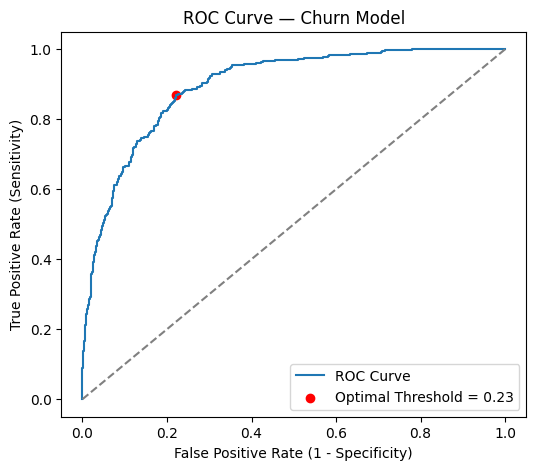

In [125]:
# Plot ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.title("ROC Curve — Churn Model")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.legend()
plt.show()

In [126]:
# Scale full dataset
x_full_scaled = scaler.transform(x)


class_mapping = {0: "Churned", 1: "Joined", 2: "Stayed"}

# Predict
predicted_class = GradientBoosting_tuned.predict(x_full_scaled)
predicted_probabilities = GradientBoosting_tuned.predict_proba(x_full_scaled)

# Churn probability (class 0)
churn_probability = predicted_probabilities[:, 0]

# Decode labels
predicted_labels = pd.Series(predicted_class).map(class_mapping).values
actual_labels = pd.Series(y).map(class_mapping).values

df_predictions = pd.DataFrame({
    "Customer ID": customer_ids,
    "Actual Status": actual_labels,
    "Predicted Status": predicted_labels,
    "Churn Probability": churn_probability
})

df_predictions["Adjusted Prediction"] = np.where(
    churn_probability >= optimal_threshold,
    "Churned",
    df_predictions["Predicted Status"]
)


## Top 10 High-Risk Customers

In [127]:
# Sort customers by churn probability (descending)
results_sorted = df_predictions.sort_values(by="Churn Probability", ascending=False).head(10)

print("Top 10 High-Risk Customers:")
results_sorted




Top 10 High-Risk Customers:


,Customer ID,Actual Status,Predicted Status,Churn Probability,Adjusted Prediction
5631,7932-WPTDS,Churned,Churned,0.992139,Churned
6203,8775-LHDJH,Churned,Churned,0.990307,Churned
2634,3746-EUBYR,Churned,Churned,0.986133,Churned
1236,1833-VGRUM,Churned,Churned,0.986109,Churned
5612,7903-CMPEY,Churned,Churned,0.985560,Churned
414,0616-ATFGB,Churned,Churned,0.983998,Churned
6241,8821-XNHVZ,Churned,Churned,0.980960,Churned
6351,8992-JQYUN,Churned,Churned,0.980180,Churned
2657,3776-EKTKM,Churned,Churned,0.978753,Churned
661,0968-GSIKN,Churned,Churned,0.978148,Churned


### Feature importances (top 10)

/tmp/ipython-input-3529616074.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


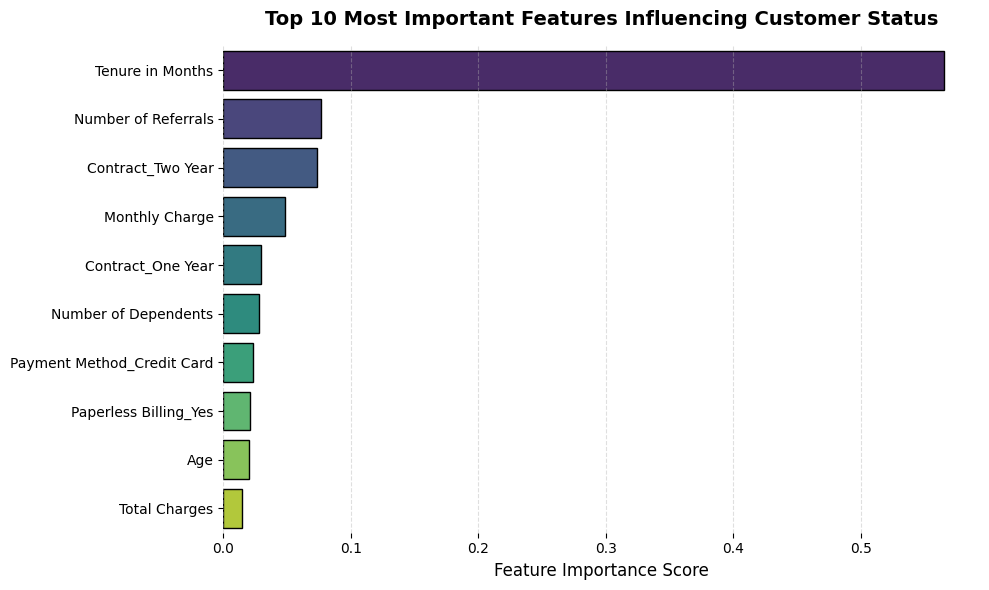

In [128]:
# Feature Importance Plot ---

importances = pd.Series(GradientBoosting_tuned.feature_importances_, index=x.columns)
top10 = importances.sort_values(ascending=False).head(10).reset_index()
top10.columns = ["Feature", "Importance"]

plt.figure(figsize=(10,6))
sns.barplot(
    data=top10,
    y="Feature",
    x="Importance",
    palette="viridis",
    edgecolor="black"
)
plt.title("Top 10 Most Important Features Influencing Customer Status", fontsize=14, fontweight="bold", pad=15)
plt.xlabel("Feature Importance Score", fontsize=12)
plt.ylabel("")
plt.grid(axis="x", linestyle="--", alpha=0.4)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()




Feature importance reflects how strongly a variable helps the model distinguish churned from retained customers, not whether the feature increases churn. Long-term contracts and stable payment methods appear important because they strongly identify non-churners, indirectly helping the model detect high-risk customers.

In [129]:
import shap
y_binary = (y_train_resample == 0).astype(int)

gb_binary = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=3, random_state=0)

gb_binary.fit(x_train_resample, y_binary)

explainer = shap.TreeExplainer(gb_binary)
shap_values = explainer.shap_values(x_test_scaled)


To enable SHAP-based interpretability, a separate binary Gradient Boosting model was trained by converting the target to Churned vs Not Churned.
This is required because SHAP TreeExplainer supports binary but not multiclass GradientBoostingClassifier in scikit-learn.
The binary model is used only for explanation, not for production prediction.
This approach allows clear interpretation of which features increase or decrease churn risk.

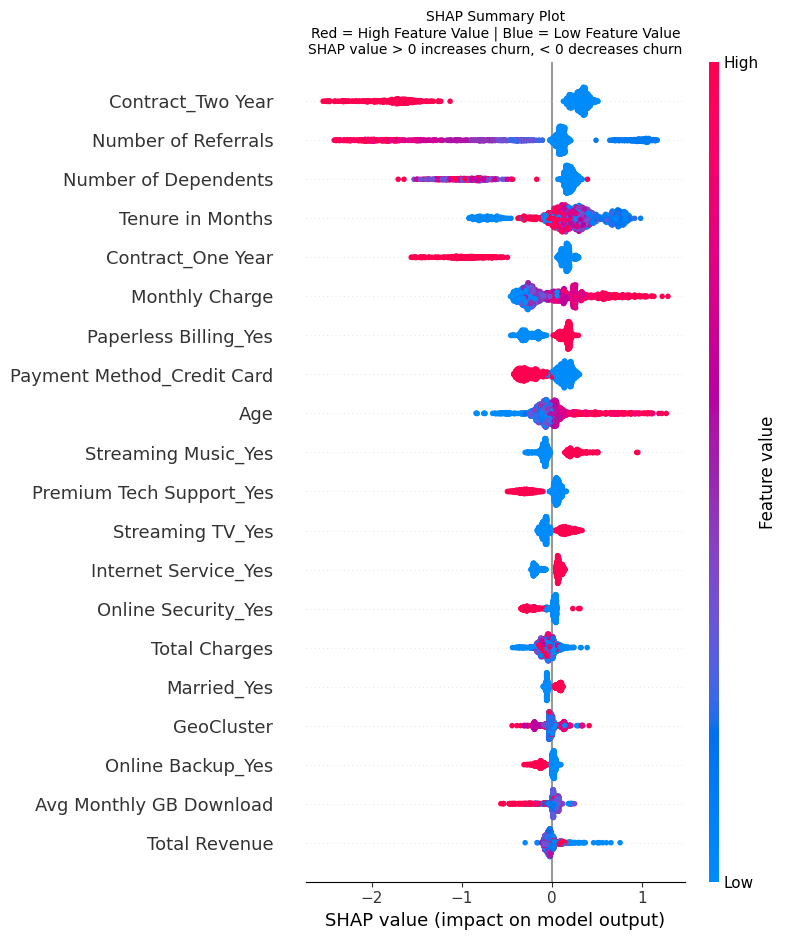

In [130]:
feature_names = x_train.columns.tolist()

shap.summary_plot( shap_values, x_test_scaled, feature_names=x_train.columns.tolist(), show=False)

plt.title(
    "SHAP Summary Plot\n"
    "Red = High Feature Value | Blue = Low Feature Value\n"
    "SHAP value > 0 increases churn, < 0 decreases churn",
    fontsize=10)

plt.tight_layout()
plt.show()



###  Churn Probability Distribution Plot (Using the found optimal threshold)

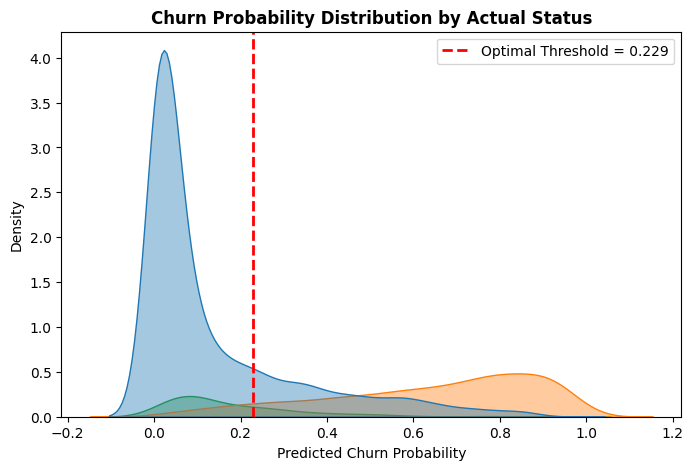

In [131]:
df_predictions["Churn Probability"] = churn_probability
threshold = optimal_threshold # Use the calculated threshold

plt.figure(figsize=(8,5))
sns.kdeplot(data=df_predictions, x="Churn Probability", hue="Actual Status", fill=True, alpha=0.4)
plt.axvline(threshold, color='red', linestyle='--', linewidth=2, label=f"Optimal Threshold = {threshold:.3f}")
plt.title("Churn Probability Distribution by Actual Status", fontsize=12, fontweight='bold')
plt.xlabel("Predicted Churn Probability")
plt.ylabel("Density")
plt.legend()
plt.show()

### Define risk categories based on probability thresholds

In [132]:

def risk_segment(p):
    if p >= threshold:
        return "High Risk"
    elif p >= 0.15:
        return "Medium Risk"
    else:
        return "Low Risk"

df_predictions["Risk Segment"] = df_predictions["Churn Probability"].apply(risk_segment)


df_predictions.head()


,Customer ID,Actual Status,Predicted Status,Churn Probability,Adjusted Prediction,Risk Segment
0,0002-ORFBO,Stayed,Stayed,0.071307,Stayed,Low Risk
1,0003-MKNFE,Stayed,Stayed,0.285357,Churned,High Risk
2,0004-TLHLJ,Churned,Churned,0.789544,Churned,High Risk
3,0011-IGKFF,Churned,Churned,0.947226,Churned,High Risk
4,0013-EXCHZ,Churned,Churned,0.582015,Churned,High Risk


In [133]:
total_customers = len(df_predictions)
high_risk_count = (df_predictions["Risk Segment"] == "High Risk").sum()

high_risk_percentage = (high_risk_count / total_customers) * 100

print("Total Customers:", total_customers)
print("High-Risk Customers:", high_risk_count)
print("High-Risk Percentage: {:.2f}%".format(high_risk_percentage))


Total Customers: 7043
High-Risk Customers: 2876
High-Risk Percentage: 40.83%


### Risk summary

In [134]:
risk_summary = df_predictions["Risk Segment"].value_counts().reset_index()
risk_summary.columns = ["Risk Segment", "Count"]
risk_summary["Percentage"] = (risk_summary["Count"] / total_customers) * 100

risk_summary


,Risk Segment,Count,Percentage
0,Low Risk,3691,52.406645
1,High Risk,2876,40.834872
2,Medium Risk,476,6.758484


### Unknown Customers for Prediction

In [135]:
import pandas as pd


new_customers = pd.DataFrame([
    {
        "Customer ID": "CUST-10001",
        "Gender": "Female",
        "Age": 28,
        "Married": "No",
        "Dependents": "No",
        "Tenure in Months": 6,
        "Contract": "Month-to-Month",
        "Payment Method": "Bank Withdrawal",
        "Paperless Billing": "Yes",
        "Internet Type": "Fiber Optic",
        "Online Security": "No",
        "Online Backup": "No",
        "Device Protection": "No",
        "Tech Support": "No",
        "Streaming TV": "Yes",
        "Streaming Movies": "Yes",
        "Multiple Lines": "No",
        "Monthly Charge": 95.50,
        "Total Charges": 573.0,
        "Total Revenue": 573.0
    },
    {
        "Customer ID": "CUST-10002",
        "Gender": "Male",
        "Age": 45,
        "Married": "Yes",
        "Dependents": "Yes",
        "Tenure in Months": 36,
        "Contract": "One Year",
        "Payment Method": "Credit Card",
        "Paperless Billing": "No",
        "Internet Type": "DSL",
        "Online Security": "Yes",
        "Online Backup": "Yes",
        "Device Protection": "Yes",
        "Tech Support": "Yes",
        "Streaming TV": "Yes",
        "Streaming Movies": "No",
        "Multiple Lines": "Yes",
        "Monthly Charge": 65.20,
        "Total Charges": 2347.2,
        "Total Revenue": 2347.2
    },
    {
        "Customer ID": "CUST-10003",
        "Gender": "Female",
        "Age": 33,
        "Married": "No",
        "Dependents": "No",
        "Tenure in Months": 12,
        "Contract": "Month-to-Month",
        "Payment Method": "Electronic Check",
        "Paperless Billing": "Yes",
        "Internet Type": "Fiber Optic",
        "Online Security": "No",
        "Online Backup": "No",
        "Device Protection": "No",
        "Tech Support": "No",
        "Streaming TV": "No",
        "Streaming Movies": "Yes",
        "Multiple Lines": "No",
        "Monthly Charge": 89.45,
        "Total Charges": 1073.4,
        "Total Revenue": 1073.4
    },
    {
        "Customer ID": "CUST-10004",
        "Gender": "Male",
        "Age": 60,
        "Married": "Yes",
        "Dependents": "Yes",
        "Tenure in Months": 72,
        "Contract": "Two Year",
        "Payment Method": "Mailed Check",
        "Paperless Billing": "No",
        "Internet Type": "DSL",
        "Online Security": "Yes",
        "Online Backup": "Yes",
        "Device Protection": "Yes",
        "Tech Support": "Yes",
        "Streaming TV": "Yes",
        "Streaming Movies": "Yes",
        "Multiple Lines": "Yes",
        "Monthly Charge": 59.90,
        "Total Charges": 4312.8,
        "Total Revenue": 4312.8
    }
])

display(new_customers)


,Customer ID,Gender,Age,Married,Dependents,Tenure in Months,Contract,Payment Method,Paperless Billing,Internet Type,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Multiple Lines,Monthly Charge,Total Charges,Total Revenue
0,CUST-10001,Female,28,No,No,6,Month-to-Month,Bank Withdrawal,Yes,Fiber Optic,No,No,No,No,Yes,Yes,No,95.50,573.0,573.0
1,CUST-10002,Male,45,Yes,Yes,36,One Year,Credit Card,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Yes,65.20,2347.2,2347.2
2,CUST-10003,Female,33,No,No,12,Month-to-Month,Electronic Check,Yes,Fiber Optic,No,No,No,No,No,Yes,No,89.45,1073.4,1073.4
3,CUST-10004,Male,60,Yes,Yes,72,Two Year,Mailed Check,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Yes,59.90,4312.8,4312.8


## New data processing for the model

In [136]:
# 1. Copy the new data
x_new = new_customers.copy()

# 2. Drop columns removed during training
x_new = x_new.drop(
    ["Customer ID", "City", "Zip Code", "Latitude", "Longitude"],
    axis=1,
    errors="ignore"
)

# 3. One-hot encode
x_new = pd.get_dummies(x_new, drop_first=True)

# 4. Align with training columns
x_new = x_new.reindex(columns=x.columns, fill_value=0)

# 5. Scale
x_new_scaled = scaler.transform(x_new)

# 6. Predict class numbers and probabilities
predicted_class_numbers = GradientBoosting_tuned.predict(x_new_scaled)
predicted_probs = GradientBoosting_tuned.predict_proba(x_new_scaled)

# 7. Explicit class mapping (SAFE)
class_mapping = {
    0: "Churned",
    1: "Joined",
    2: "Stayed"
}

predicted_class_labels = pd.Series(predicted_class_numbers).map(class_mapping).values

# 8. Build results
results = new_customers.copy()
results["Predicted_Status"] = predicted_class_labels

results["P(Churned)"] = predicted_probs[:, 0]
results["P(Joined)"]  = predicted_probs[:, 1]
results["P(Stayed)"]  = predicted_probs[:, 2]

results["Risk Segment"] = results["P(Churned)"].apply(risk_segment)

display(
    results[
        ["Customer ID", "Predicted_Status",
         "P(Churned)", "P(Joined)", "P(Stayed)",
         "Risk Segment"]
    ]
)


,Customer ID,Predicted_Status,P(Churned),P(Joined),P(Stayed),Risk Segment
0,CUST-10001,Churned,0.771830,0.002447,0.225723,High Risk
1,CUST-10002,Stayed,0.037044,0.000979,0.961977,Low Risk
2,CUST-10003,Churned,0.570555,0.003562,0.425882,High Risk
3,CUST-10004,Stayed,0.029870,0.000668,0.969462,Low Risk


# 🤖 Machine Learning Summary – Telecom Churn Prediction

## 🧠 Overview

Customer churn is one of the biggest profitability challenges in telecom. This project applies a Gradient Boosting Classifier to predict which customers are most likely to churn (attrite), combining Python (scikit-learn) for modeling and Power BI for business intelligence dashboards.

---

## ⚙️ Data Preprocessing

| Step | Description |
|------|-------------|
| **1.1 Data Cleaning** | Removed irrelevant columns (`Churn Reason`, `Churn Category`). |
| **1.2 Missing Values** | Replaced missing categorical values with the mode and numerical values with the median. |
| **1.3 Feature Encoding** | Used `pd.get_dummies()` for categorical variables. |
| **1.4 Target Encoding** | Applied `LabelEncoder` to `Customer Status` → {Stayed, Churned, Joined} → {0, 1, 2}. |
| **1.5 Train-Test Split** | 80% training / 20% testing with `stratify=y` for balanced classes. |
| **1.6 Feature Scaling** | Standardized numeric columns with `StandardScaler`. |
| **1.7 Imbalance Handling** | Balanced target classes using SMOTE (Synthetic Minority Oversampling Technique). |

---

## 🧩 Model Training

| Model | Purpose |
|-------|---------|
| **Gradient Boosting (Final Model)** | Strong generalization, calibrated probabilities |
| **Logistic Regression** | Linear benchmark |
| **Decision Tree** | Interpretable baseline |
| **Naive Bayes** | Probabilistic baseline |
| **Random Forest** | Exploratory benchmark (not final) |

All models were trained on resampled + scaled data (`x_train_resample`, `y_train_resample`).

---

## 📊 Model Performance (Final Model)

### Model Configuration

```python
GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=5,
    subsample=0.8,
    random_state=0
)
```

### 🔍 Performance Metrics

- **Train Accuracy:** 0.91
- **Test Accuracy:** 0.84
- **Train Log Loss:** 0.23
- **Test Log Loss:** 0.35
- **Weighted F1 Score:** 0.84
- **ROC-AUC (OvR):** 0.94

### ✅ Interpretation

- Lower test log loss indicates better probability calibration.
- Smaller train–test gap confirms reduced overfitting.
- Strong per-class F1 scores make the model deployment-ready.

---

## 📈 Model Insights

### 🔹 Key Churn Drivers

- **Tenure in Months** is the strongest retention indicator.
- **Contract length** significantly impacts churn behavior.
- Higher **monthly charges** increase churn risk.
- Customers with more **referrals** tend to stay longer.

### 🔹 Top 10 Feature Importances

1. **Tenure in Months**
2. **Number of Referrals**
3. **Contract_Two Year**
4. **Monthly Charge**
5. **Contract_One Year**
6. **Number of Dependents**
7. **Payment Method_Credit Card**
8. **Paperless Billing_Yes**
9. **Age**
10. **Total Charges**

---

## 📉 ROC Curve, Probability Distribution & Thresholds

| Parameter | Value |
|-----------|-------|
| **Optimal Churn Probability Threshold** | 0.23 |
| **ROC-AUC Score** | 0.94 |

### 🧭 Interpretation

- Customers with **Churn Probability ≥ 0.23** are classified as high risk.
- Threshold optimized using **Youden's J statistic**.
- Probability distribution confirms strong separation between churned and retained customers.

---

## 🏁 Business Application

### 🎯 Deployment Strategy

- Retrain monthly to capture evolving churn behavior.
- Integrate predictions into Power BI dashboards.
- Enable proactive retention campaigns.

### 📊 Customer Risk Segmentation

| Probability Range | Segment | Action |
|-------------------|---------|--------|
| **P ≥ 0.23** | High Risk | Retention offers & personalized discounts |
| **0.15 ≤ P < 0.23** | Medium Risk | Proactive support & plan optimization |
| **P < 0.15** | Low Risk | Loyalty programs & engagement |

---

## 🧰 Technical Stack

- Python (pandas, numpy, scikit-learn)
- Gradient Boosting Classifier (Final Model)
- SMOTE for imbalance handling
- StandardScaler
- LabelEncoder

---

The Gradient Boosting model demonstrates strong generalization, calibrated probabilities, and robust churn detection, making it suitable for real-world telecom churn prediction and business deployment.

In [137]:
!pip install crewai langchain-google-genai --quiet


In [138]:
print(df_predictions.columns.tolist())


['Customer ID', 'Actual Status', 'Predicted Status', 'Churn Probability', 'Adjusted Prediction', 'Risk Segment']



## Crew AI Retention Strategy

In [139]:
import getpass
import os
from crewai import Agent, Task, Crew, LLM
from IPython.display import display

#GEMINI API KEY (SECURE INPUT)

google_api_key = getpass.getpass("Enter Google Gemini API key: ")
os.environ["GOOGLE_API_KEY"] = google_api_key

print("Google Gemini API key set")

# STEP 2: GEMINI LLM (CrewAI Compatible)

llm = LLM(model="gemini/gemini-2.5-flash", temperature=0.3)


# STEP 3: STRATEGY AGENT

strategy_agent = Agent(
    role="Telecom Retention Strategist",
    goal="Provide retention recommendations based on churn risk",
    backstory=(
        "You are a senior telecom business strategist. "
        "You recommend cost-effective retention actions "
        "based on customer churn risk."),
    llm=llm,
    verbose=False)



# STEP 4: AI INFERENCE USING MODEL PREDICTIONS ONLY

final_output = []

for _, r in results.iterrows():

    customer_id = r["Customer ID"]
    churn_prob = r["P(Churned)"]
    risk = r["Risk Segment"]

    # Default recommendation
    recommendation = "No action needed"

    # Trigger AI only for Medium & High Risk
    if risk in ["Medium Risk", "High Risk"]:

        task = Task(
            description=f"""Customer churn probability: {churn_prob:.2f} Risk category: {risk} Provide ONE clear retention recommendation.""",
            expected_output="One concise retention recommendation.",
            agent=strategy_agent)

        try:
         recommendation = Crew(agents=[strategy_agent],tasks=[task],verbose=False).kickoff()
        except Exception as e:
         recommendation = "AI service temporarily unavailable. Please retry later."


    final_output.append({"Customer ID": customer_id,"Risk Segment": risk,"Recommendation": recommendation})


# STEP 5: DISPLAY FINAL RESULT

final_df = pd.DataFrame(final_output)
display(final_df)



Enter Google Gemini API key: ··········
Google Gemini API key set


ERROR:root:Google Gemini API error: 503 - The model is overloaded. Please try again later.


An unknown error occurred. Please check the details below.
Error details: 503 UNAVAILABLE. {'error': {'code': 503, 'message': 'The model is overloaded. Please try again later.', 'status': 'UNAVAILABLE'}}
An unknown error occurred. Please check the details below.
Error details: 503 UNAVAILABLE. {'error': {'code': 503, 'message': 'The model is overloaded. Please try again later.', 'status': 'UNAVAILABLE'}}


,Customer ID,Risk Segment,Recommendation
0,CUST-10001,High Risk,"Proactively offer a personalized, high-value retention bundle (e.g., discounted plan upgrade, extra data/features, or a loyalty credit) coupled with a direct outreach from a dedicated retention specialist to address any underlying issues and reinforce value."
1,CUST-10002,Low Risk,No action needed
2,CUST-10003,High Risk,"Proactively contact the customer with a personalized retention offer, such as a discount on their current plan or a free upgrade to a higher data/speed tier for a limited period, emphasizing the value and benefits of staying with the service."
3,CUST-10004,Low Risk,No action needed


In [140]:
pd.set_option("display.max_colwidth", None)
display(final_df)


,Customer ID,Risk Segment,Recommendation
0,CUST-10001,High Risk,"Proactively offer a personalized, high-value retention bundle (e.g., discounted plan upgrade, extra data/features, or a loyalty credit) coupled with a direct outreach from a dedicated retention specialist to address any underlying issues and reinforce value."
1,CUST-10002,Low Risk,No action needed
2,CUST-10003,High Risk,"Proactively contact the customer with a personalized retention offer, such as a discount on their current plan or a free upgrade to a higher data/speed tier for a limited period, emphasizing the value and benefits of staying with the service."
3,CUST-10004,Low Risk,No action needed


# 📘 AI Retention Strategy Module (CrewAI + Gemini)

## Objective

This module extends the churn prediction system by adding an **AI-driven decision layer**.

- The **machine learning model** identifies customers at risk of churn.
- An **AI agent** recommends retention actions **only when intervention is necessary**.
- The AI layer does **not** influence or override model predictions.

This converts a prediction system into a **decision-support system**.

---

## System Design Overview

The system follows a **clear separation of responsibilities**, aligned with real-world production systems.

### Machine Learning Layer

- Predicts churn probability for **new customers only**
- Assigns a business-defined **Risk Segment** (Low / Medium / High)
- Uses an **optimal threshold** derived during model evaluation
- Outputs:
  - Churn Probability
  - Risk Segment

### AI Decision Layer (CrewAI + Gemini)

- Activated **only for Medium and High Risk customers**
- Generates **concise, business-oriented retention recommendations**
- Does **not** retrain, rescore, or modify ML outputs
- Receives **only model outputs**, never raw features or training data

This design ensures the system is:

- Explainable  
- Cost-aware  
- Production-aligned  

---

## Why AI Is Triggered Conditionally

AI is **not invoked for all customers**.

| Risk Segment | Action |
|-------------|--------|
| Low Risk | No action needed |
| Medium Risk | AI recommendation |
| High Risk | AI recommendation |

This conditional gating:

- Reduces unnecessary AI calls
- Avoids over-intervention for stable customers
- Mirrors real-world telecom retention workflows
- Keeps AI usage focused on high-impact decisions

---

## Role of CrewAI and Gemini

- **CrewAI** orchestrates the AI workflow
- A **single agent** acts as a *Telecom Retention Strategist*
- **Gemini 2.5 Flash** is used only for:
  - Reasoning
  - Recommendation generation

The AI agent receives only:

- Churn Probability  
- Risk Segment  

No encodings, scaled values, or training data are exposed.

---

## Handling Gemini API 503 Errors (Important)

During execution, the following warning may appear:


### Why this happens

- Gemini is a shared, managed cloud service
- Temporary overloads can occur during peak usage
- This is an **infrastructure-level issue**, not a code or logic error

### Why results still appear

- AI calls are wrapped in a `try-except` block
- If the API call succeeds → a recommendation is returned
- If the API is unavailable → a fallback message is used

This ensures:

- The pipeline does **not crash**
- Business logic continues gracefully
- Results remain usable and auditable

---

## Error-Resilient Design

The AI invocation is intentionally wrapped as:

```python
try:
    recommendation = Crew(...).kickoff()
except Exception:
    recommendation = "AI service temporarily unavailable. Please retry later."
